In [1]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt


In [2]:
url = 'https://raw.githubusercontent.com/vfayosp/project_aidl2022/main/data/df_protein_disease.csv'

data_protein_disease = pd.read_csv(url, sep='\t',decimal = ',', index_col = "Unnamed: 0")

data_protein_disease

,depressive disorder,drug-induced liver injury,mercury poisoning,necrosis,neoplasms,"anemia, hemolytic",attention deficit and disruptive behavior disorders,autistic disorder,cognition disorders,cystitis,heavy metal toxicity,hemolysis,hypertension,lead poisoning,learning disorders,lung injury,"micronuclei, chromosome-defective",pneumonia,anxiety disorders,ataxia,autoimmune diseases,brain diseases,brain edema,brain injuries,cardiomyopathies,craniofacial abnormalities,death,"disease models, animal",drug toxicity,epilepsy,"epilepsy, absence",fetal growth retardation,hyperkinesis,"hypersensitivity, delayed",kidney diseases,"lead poisoning, nervous system",memory disorders,movement disorders,myoclonus,nerve degeneration,...,"neuropathy, hereditary sensory and autonomic, type iia",odontoonychodermal dysplasia,schopf-schulz-passarge syndrome,split-hand/foot malformation 6,tetra-amelia autosomal recessive,"46,xx sex reversal with dysgenesis of kidneys, adrenals, and lungs",mullerian aplasia and hyperandrogenism,rokitansky kuster hauser syndrome,al awadi syndrome,"fibular aplasia or hypoplasia, femoral bowing and poly-, syn-, and oligodactyly",denys-drash syndrome,frasier syndrome,meacham winn culler syndrome,"nephrotic syndrome, type 4",wilson-turner x-linked mental retardation syndrome,major affective disorder 7,"xanthinuria, type i","xeroderma pigmentosum, complementation group c",nephronophthisis-like nephropathy 1,"charcot-marie-tooth disease, dominant intermediate c",t cell immunodeficiency primary,"skeletal defects, genital hypoplasia, and mental retardation","mental retardation, x-linked 91","mental retardation, x-linked, syndromic, raymond type","corneal dystrophy, fuchs endothelial, 6","corneal dystrophy, posterior polymorphous, 3",mowat-wilson syndrome,diaphragmatic hernia 3,"spastic paraplegia 15, autosomal recessive","spastic paraplegia 33, autosomal dominant",holoprosencephaly 5,"heterotaxy, visceral, x-linked",acro-osteolysis,mandibuloacral dysplasia with type b lipodystrophy,"nephrolithiasis, uric acid, susceptibility to",ehlers-danlos syndrome 6b,retinitis pigmentosa 58,"spinocerebellar ataxia, autosomal recessive 5",seborrhea-like dermatitis with psoriasiform elements,"mental retardation, x-linked 45"
Q9UI32,1,1,0,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P00488,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P35228,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P06737,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P11766,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P07510,0,1,1,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Q04844,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P31327,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P0C0L4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,

In [3]:
data_protein_disease = np.array(data_protein_disease)

In [4]:
url = 'https://raw.githubusercontent.com/vfayosp/project_aidl2022/main/data/df_drug_protein.csv'

data_drug_protein = pd.read_csv(url, sep='\t',decimal = ',', index_col = "Unnamed: 0")

data_drug_protein

,Q9UI32,P00488,P35228,P06737,P11766,P50213,P30542,P00519,P12319,P00451,P23219,P35626,P21728,P35916,P51168,P02452,Q9H4B7,P56181,P17948,Q9UPY5,P06213,P04049,Q9Y285,Q9Y234,P12259,P24530,P20309,P30613,P00734,P30273,P13716,P48167,P21554,P30556,P34995,P10515,P11836,P29475,P07195,Q07869,...,Q92993,O60493,P55789,O60264,Q92830,Q16613,O15066,P78330,Q9BZZ2,Q01082,Q15382,Q99873,P61587,P36222,O75676,Q53H96,P61221,P40937,P60953,Q99661,Q96QT4,O14964,Q96KC2,O00187,Q9UL51,Q9UL54,P41091,Q96GD3,P36405,P30041,O15111,Q99835,P02708,P11230,Q07001,P07510,Q04844,P31327,P0C0L4,P0C0L5
DB00050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB00152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB00162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB00175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB00176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB06711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB06800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB06811,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB08826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
data_drug_protein = np.array(data_drug_protein)

In [6]:
url = 'https://raw.githubusercontent.com/vfayosp/project_aidl2022/main/data/df_drug_disease.csv'

data_drug_disease = pd.read_csv(url, sep='\t',decimal = ',', index_col = "Unnamed: 0")

data_drug_disease

,depressive disorder,drug-induced liver injury,mercury poisoning,necrosis,neoplasms,"anemia, hemolytic",attention deficit and disruptive behavior disorders,autistic disorder,cognition disorders,cystitis,heavy metal toxicity,hemolysis,hypertension,lead poisoning,learning disorders,lung injury,"micronuclei, chromosome-defective",pneumonia,anxiety disorders,ataxia,autoimmune diseases,brain diseases,brain edema,brain injuries,cardiomyopathies,craniofacial abnormalities,death,"disease models, animal",drug toxicity,epilepsy,"epilepsy, absence",fetal growth retardation,hyperkinesis,"hypersensitivity, delayed",kidney diseases,"lead poisoning, nervous system",memory disorders,movement disorders,myoclonus,nerve degeneration,...,"neuropathy, hereditary sensory and autonomic, type iia",odontoonychodermal dysplasia,schopf-schulz-passarge syndrome,split-hand/foot malformation 6,tetra-amelia autosomal recessive,"46,xx sex reversal with dysgenesis of kidneys, adrenals, and lungs",mullerian aplasia and hyperandrogenism,rokitansky kuster hauser syndrome,al awadi syndrome,"fibular aplasia or hypoplasia, femoral bowing and poly-, syn-, and oligodactyly",denys-drash syndrome,frasier syndrome,meacham winn culler syndrome,"nephrotic syndrome, type 4",wilson-turner x-linked mental retardation syndrome,major affective disorder 7,"xanthinuria, type i","xeroderma pigmentosum, complementation group c",nephronophthisis-like nephropathy 1,"charcot-marie-tooth disease, dominant intermediate c",t cell immunodeficiency primary,"skeletal defects, genital hypoplasia, and mental retardation","mental retardation, x-linked 91","mental retardation, x-linked, syndromic, raymond type","corneal dystrophy, fuchs endothelial, 6","corneal dystrophy, posterior polymorphous, 3",mowat-wilson syndrome,diaphragmatic hernia 3,"spastic paraplegia 15, autosomal recessive","spastic paraplegia 33, autosomal dominant",holoprosencephaly 5,"heterotaxy, visceral, x-linked",acro-osteolysis,mandibuloacral dysplasia with type b lipodystrophy,"nephrolithiasis, uric acid, susceptibility to",ehlers-danlos syndrome 6b,retinitis pigmentosa 58,"spinocerebellar ataxia, autosomal recessive 5",seborrhea-like dermatitis with psoriasiform elements,"mental retardation, x-linked 45"
DB00050,1,1,1,1,1,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB00152,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB00162,1,1,0,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB00175,1,1,0,1,1,1,0,1,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB00176,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB06711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB06800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB06811,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DB08826,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0

In [7]:
data_drug_disease = np.array(data_drug_disease)

# DRUG PROTEIN

Now we have the data cleaned, however, we want to check if every drug has at least interactss with two proteins (in order to at least divide them in train and test) and each protein with at least one drug (if not it makes no sense to give it to the model).

computing the interactions of each drug

In [ ]:
l=list(data_drug_protein.sum(axis=1))
print("Total number of drugs: ", len(l))
c=0
for i in l:
  if i <2:
    c+=1
print("Drugs with less than 2 interactions: ", c)

Total number of drugs:  708
Drugs with less than 2 interactions:  340


How many drugs have less than 2 interactions?

In [ ]:
c=0
for i in l:
  if i <2:
    c+=1
print(c)

340


Ploting an histogram

(array([340., 135.,  69.,  44.,  32.,  34.,   7.,   7.,   3.,   2.,  18.,
          4.,   2.,   0.,   1.,   4.,   1.,   0.,   0.,   5.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ,
        13.2, 14.4, 15.6, 16.8, 18. , 19.2, 20.4, 21.6, 22.8, 24. ]),
 <a list of 20 Patch objects>)

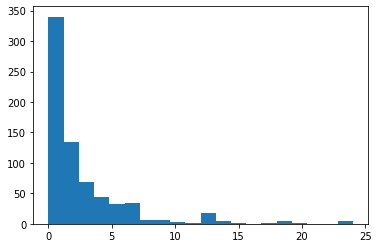

In [ ]:
plt.hist(l, 20)

getting the indexes of the rows in order to delete them

In [ ]:
index_drugs = [i for i in range(len(l)) if l[i] <2 ]
len(index_drugs)


340

In [ ]:
data_drug_protein.shape

(708, 1491)

In [ ]:
data = np.delete(data_drug_protein, index_drugs, axis=0)
data_drug_protein.shape

(368, 1491)

Now we have a dataset in which each drug at least interacts twice with the environment. Let's do it for the proteins.

(array([1.298e+03, 7.000e+01, 2.400e+01, 1.700e+01, 6.000e+00, 1.100e+01,
        8.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 6.000e+00, 5.000e+00, 0.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.  ,  1.05,  2.1 ,  3.15,  4.2 ,  5.25,  6.3 ,  7.35,  8.4 ,
         9.45, 10.5 , 11.55, 12.6 , 13.65, 14.7 , 15.75, 16.8 , 17.85,
        18.9 , 19.95, 21.  , 22.05, 23.1 , 24.15, 25.2 , 26.25, 27.3 ,
        28.35, 29.4 , 30.45, 31.5 , 32.55, 33.6 , 34.65, 35.7 , 36.75,
        37.8 , 38.85, 39.9 , 40.95, 42.  ]),
 <a list of 40 Patch objects>)

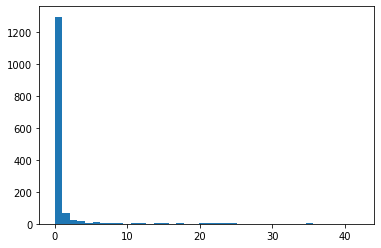

In [ ]:
l=list(data.sum(axis=0))
plt.hist(l, 40)

In [ ]:
c=0
for i in l:
  if i ==0 :
    c+=1
print(c)

1096


In [ ]:
index_proteins = [i for i in range(len(l)) if l[i] == 0]
len(index_proteins)

1096

In [ ]:
data_drug_protein = np.delete(data_drug_protein, index_proteins, axis=1)
data_drug_protein.shape

(368, 395)

Now lets compute the train and test data sets:

In [ ]:
lista=list(np.where(data_drug_protein[0])[0])
lista.remove(33)
print(lista)

[51]


In [ ]:
def compute_train_test(data):
  my_data_train = []
  my_data_test = []
  for i in range(data.shape[0]):
    lista= list(np.where(data[i])[0])
    r = random.choice(lista)
    lista.remove(r)
    my_data_test.append([i, r + data.shape[0],1])
    for j in lista:
      my_data_train.append([i, j + data.shape[0],1])
  df_train = pd.DataFrame(my_data_train, columns = ['drug', 'protein', 'value'])
  df_test = pd.DataFrame(my_data_test, columns = ['drug', 'protein', 'value'])
  return (df_train,df_test)
  

In [ ]:
(df_train,df_test)= compute_train_test(data_drug_protein)

In [ ]:
df_train

,drug,protein,value
0,0,419,1
1,1,436,1
2,1,444,1
3,1,509,1
4,1,512,1
...,...,...,...
1366,364,601,1
1367,365,472,1
1368,365,521,1
1369,366,441,1


In [ ]:
df_test

,drug,protein,value
0,0,401,1
1,1,562,1
2,2,682,1
3,3,527,1
4,4,578,1
...,...,...,...
363,363,443,1
364,364,452,1
365,365,558,1
366,366,496,1


Saving the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
saving_path="gdrive/MyDrive/project/AIDL_2022_drug_recomendation/AIDL_project/data/"

In [ ]:
df_train.to_csv(saving_path+'df_train_drug_protein.csv', sep='\t')
df_test.to_csv(saving_path+'df_test_drug_protein.csv', sep='\t')


# PROTEIN-DISEASE

[866, 949, 2319, 1197, 804, 1212, 1313, 1423, 799, 1164, 1795, 798, 1071, 600, 1023, 2084, 574, 755, 1362, 1421, 1435, 1618, 593, 285, 1052, 1786, 891, 1324, 1747, 1266, 1276, 774, 1504, 1007, 729, 1240, 623, 1702, 1482, 1867, 645, 1425, 1452, 897, 1611, 973, 1081, 227, 1448, 901, 608, 999, 1073, 1130, 959, 1517, 1240, 369, 639, 1386, 718, 1099, 1107, 1056, 1155, 1659, 735, 1879, 1252, 1341, 915, 599, 1003, 1816, 1686, 927, 1046, 1187, 1169, 491, 757, 1097, 1017, 924, 439, 623, 828, 857, 1292, 519, 1381, 1225, 1354, 997, 2309, 1244, 671, 82, 1433, 874, 873, 1105, 1017, 1020, 1141, 1700, 1321, 999, 929, 583, 1265, 705, 884, 1498, 1362, 903, 1134, 1301, 797, 1957, 1133, 1125, 1494, 1293, 1532, 769, 940, 582, 1407, 508, 1121, 1092, 1153, 1705, 1994, 1277, 933, 717, 2501, 978, 1343, 768, 1195, 995, 1309, 973, 140, 625, 1141, 951, 2284, 2035, 656, 1440, 661, 1567, 1105, 903, 769, 1286, 1084, 822, 874, 1453, 1066, 1243, 606, 956, 553, 961, 1235, 1273, 1203, 643, 1345, 1263, 1226, 778, 1039, 

(array([  7.,   4.,   5.,   9.,   7.,  26.,  26.,  39.,  62.,  75.,  81.,
         97.,  79.,  97., 107., 105.,  95.,  81.,  90.,  62.,  64.,  65.,
         45.,  29.,  22.,  23.,  21.,  12.,   5.,  13.,   9.,   3.,   5.,
          3.,   8.,   3.,   2.,   2.,   2.,   1.]),
 array([1.0000e+00, 6.8100e+01, 1.3520e+02, 2.0230e+02, 2.6940e+02,
        3.3650e+02, 4.0360e+02, 4.7070e+02, 5.3780e+02, 6.0490e+02,
        6.7200e+02, 7.3910e+02, 8.0620e+02, 8.7330e+02, 9.4040e+02,
        1.0075e+03, 1.0746e+03, 1.1417e+03, 1.2088e+03, 1.2759e+03,
        1.3430e+03, 1.4101e+03, 1.4772e+03, 1.5443e+03, 1.6114e+03,
        1.6785e+03, 1.7456e+03, 1.8127e+03, 1.8798e+03, 1.9469e+03,
        2.0140e+03, 2.0811e+03, 2.1482e+03, 2.2153e+03, 2.2824e+03,
        2.3495e+03, 2.4166e+03, 2.4837e+03, 2.5508e+03, 2.6179e+03,
        2.6850e+03]),
 <a list of 40 Patch objects>)

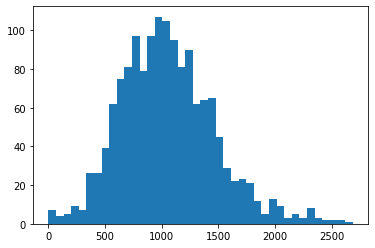

In [ ]:
l=list(data_protein_disease.sum(axis=1))
print(l)
plt.hist(l, 40)


In [ ]:
c=0
for i in l:
  if i <2:
    c+=1
print(c)

1


There are no rows with 

In [ ]:
index_proteins2 = [i for i in range(len(l)) if l[i] <2]
len(index_proteins2)

1

In [ ]:
index_proteins2

[878]

Checking if the prtotein that has less than two diseases is inside the proteins we discarted before

In [ ]:
index_proteins2[0] in index_proteins

True

We can delete the rows from index_proteins

In [ ]:
print(data_protein_disease.shape)
data_protein_disease = np.delete(data_protein_disease, index_proteins, axis=0)
data_protein_disease.shape

(1491, 5603)


(395, 5603)

Lets check there is no empty columns

(array([2963.,  173.,  158.,  122.,   97.,   86.,  119.,   81.,   69.,
          70.,   70.,  103.,   82.,   62.,   70.,   67.,   65.,   63.,
          48.,   59.,   44.,   36.,   46.,   58.,   45.,   58.,   40.,
          33.,   46.,   29.,   49.,   40.,   49.,   47.,   55.,   55.,
          45.,   67.,   69.,   65.]),
 array([  0.   ,   9.825,  19.65 ,  29.475,  39.3  ,  49.125,  58.95 ,
         68.775,  78.6  ,  88.425,  98.25 , 108.075, 117.9  , 127.725,
        137.55 , 147.375, 157.2  , 167.025, 176.85 , 186.675, 196.5  ,
        206.325, 216.15 , 225.975, 235.8  , 245.625, 255.45 , 265.275,
        275.1  , 284.925, 294.75 , 304.575, 314.4  , 324.225, 334.05 ,
        343.875, 353.7  , 363.525, 373.35 , 383.175, 393.   ]),
 <a list of 40 Patch objects>)

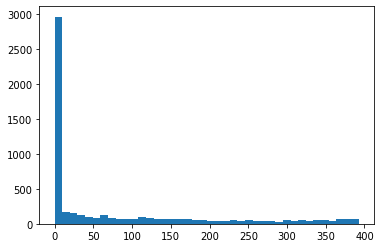

In [ ]:
l=list(data_protein_disease.sum(axis=0))
plt.hist(l, 40)

In [ ]:
c=0
for i in l:
  if i == 0:
    c+=1
print(c)

2426


In [ ]:
index_disease = [i for i in range(len(l)) if l[i] == 0]
len(index_disease)


2426

In [ ]:
data_protein_disease.shape

(395, 5603)

In [ ]:
data_protein_disease = np.delete(data_protein_disease, index_disease, axis=1)
data_protein_disease.shape

(395, 3177)

In [ ]:
(df_train,df_test)= compute_train_test(data_protein_disease)
df_train

,drug,protein,value
0,0,395,1
1,0,396,1
2,0,397,1
3,0,398,1
4,0,399,1
...,...,...,...
439540,394,2884,1
439541,394,2898,1
439542,394,3378,1
439543,394,3379,1


In [ ]:
df_test

,drug,protein,value
0,0,793,1
1,1,920,1
2,2,2310,1
3,3,451,1
4,4,1837,1
...,...,...,...
390,390,909,1
391,391,979,1
392,392,431,1
393,393,623,1


In [ ]:
df_train.to_csv(saving_path+'df_train_protein_disease.csv', sep='\t')
df_test.to_csv(saving_path+'df_test_protein_disease.csv', sep='\t')

# DRUG-DISEASE

[347, 122, 851, 539, 212, 567, 366, 48, 286, 625, 1227, 4, 91, 93, 1046, 49, 243, 94, 193, 1290, 95, 188, 8, 883, 88, 500, 23, 207, 568, 312, 202, 62, 25, 135, 319, 29, 274, 364, 75, 412, 671, 240, 43, 23, 172, 332, 277, 35, 79, 80, 114, 363, 1061, 491, 234, 80, 65, 597, 133, 218, 284, 199, 909, 34, 82, 543, 287, 13, 231, 303, 5, 9, 29, 280, 66, 121, 1089, 239, 233, 1, 116, 3, 701, 8, 81, 600, 2414, 36, 2918, 545, 174, 202, 109, 455, 215, 1, 27, 1151, 70, 665, 444, 592, 448, 251, 724, 80, 121, 288, 16, 73, 74, 72, 48, 19, 82, 88, 110, 125, 328, 4, 930, 182, 547, 792, 122, 178, 28, 128, 9, 3, 90, 29, 245, 545, 330, 62, 994, 335, 225, 7, 1464, 465, 302, 99, 168, 102, 408, 1406, 79, 444, 82, 79, 62, 660, 387, 2, 138, 6, 801, 48, 218, 440, 86, 347, 127, 797, 6, 77, 285, 550, 8, 51, 89, 156, 464, 500, 174, 51, 155, 196, 384, 926, 78, 62, 98, 652, 3, 123, 296, 1195, 795, 88, 88, 13, 131, 245, 208, 141, 148, 74, 859, 13, 89, 644, 103, 538, 716, 547, 72, 1736, 379, 174, 11, 33, 17, 483, 80, 26

(array([227., 118.,  64.,  61.,  48.,  23.,  31.,  39.,  19.,  15.,  15.,
         10.,  10.,   1.,   4.,   2.,   4.,   2.,   1.,   2.,   2.,   3.,
          1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.000000e+00, 7.392500e+01, 1.468500e+02, 2.197750e+02,
        2.927000e+02, 3.656250e+02, 4.385500e+02, 5.114750e+02,
        5.844000e+02, 6.573250e+02, 7.302500e+02, 8.031750e+02,
        8.761000e+02, 9.490250e+02, 1.021950e+03, 1.094875e+03,
        1.167800e+03, 1.240725e+03, 1.313650e+03, 1.386575e+03,
        1.459500e+03, 1.532425e+03, 1.605350e+03, 1.678275e+03,
        1.751200e+03, 1.824125e+03, 1.897050e+03, 1.969975e+03,
        2.042900e+03, 2.115825e+03, 2.188750e+03, 2.261675e+03,
        2.334600e+03, 2.407525e+03, 2.480450e+03, 2.553375e+03,
        2.626300e+03, 2.699225e+03, 2.772150e+03, 2.845075e+03,
        2.918000e+03]),
 <a list of 40 Patch objects>)

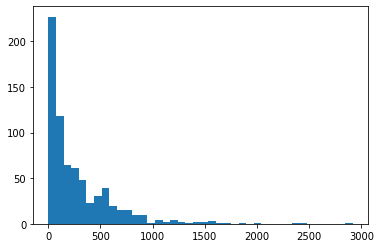

In [ ]:
l=list(data_drug_disease.sum(axis=1))
print(l)
plt.hist(l, 40)

In [ ]:
c=0
for i in l:
  if i <2:
    c+=1
print(c)

10


In [ ]:
index_drugs2 = [i for i in range(len(l)) if l[i] <2]
len(index_drugs2)

10

In [ ]:
index_drugs2

[79, 95, 223, 286, 409, 413, 636, 676, 690, 703]

In [ ]:
for i in index_drugs2:
  if i not in index_drugs:
    print(i)

286
413
703


In [ ]:
len(index_drugs)

340

In [ ]:
for i in index_drugs:
  if i not in index_drugs2:
    print(i)

1
3
4
5
6
7
13
18
21
27
28
29
30
33
34
36
37
39
42
44
45
47
51
52
53
54
55
56
59
63
66
67
70
73
75
77
80
81
84
89
91
94
98
99
102
104
105
106
107
113
114
117
118
119
124
129
131
137
139
142
147
149
150
152
155
157
159
161
162
163
166
167
168
169
173
177
180
181
182
186
187
192
197
198
199
200
205
207
208
209
211
212
214
215
216
218
219
221
222
224
227
229
230
231
232
234
235
237
239
240
241
246
247
248
249
250
253
254
256
258
259
263
267
269
270
273
274
277
278
282
284
285
288
290
293
296
297
298
301
303
304
305
307
308
313
318
319
320
323
326
328
331
334
336
338
342
345
348
350
351
352
353
354
355
357
358
359
360
362
366
369
372
383
385
386
387
390
394
399
402
403
404
407
408
412
414
415
416
417
418
419
421
422
426
430
434
435
438
440
443
445
447
450
452
453
456
457
459
464
465
466
467
468
470
471
472
474
475
476
479
481
482
484
487
488
489
490
492
493
494
497
498
500
501
503
510
512
513
515
517
518
519
525
527
531
533
535
538
540
542
545
547
551
555
556
557
558
559
560
562
563
568
57

In [ ]:
print(data_drug_disease.shape)
data_drug_disease = np.delete(data_drug_disease, index_drugs2, axis=0)
data_drug_disease.shape

In [ ]:
l=list(data.sum(axis=0))
plt.hist(l, 40)

In [ ]:
c=0
for i in l:
  if i == 0:
    c+=1
print(c)

In [ ]:
index_disease2 = [i for i in range(len(l)) if l[i] == 0]
len(index_disease2)


In [ ]:
index_disease2

In [ ]:
index_disease2[0] in index_disease

In [ ]:
data_drug_disease.shape

In [ ]:
data_drug_disease = np.delete(data_drug_disease, index_drugs, axis=1)
data_drug_disease.shape

In [ ]:
(df_train,df_test)= compute_train_test(data_drug_disease)
df_train

In [ ]:
df_test

In [ ]:
df_train.to_csv(saving_path+'df_train_drug_disease.csv', sep='\t')
df_test.to_csv(saving_path+'df_test_drug_disease.csv', sep='\t')